In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv("flight_train.csv")
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          55000 non-null  int64  
 1   FFP_DATE           55000 non-null  object 
 2   FIRST_FLIGHT_DATE  55000 non-null  object 
 3   GENDER             54997 non-null  object 
 4   FFP_TIER           55000 non-null  int64  
 5   WORK_CITY          53034 non-null  object 
 6   WORK_PROVINCE      52216 non-null  object 
 7   WORK_COUNTRY       54980 non-null  object 
 8   AGE                54658 non-null  float64
 9   LOAD_TIME          55000 non-null  object 
 10  FLIGHT_COUNT       55000 non-null  int64  
 11  BP_SUM             55000 non-null  int64  
 12  SUM_YR_1           54738 non-null  float64
 13  SUM_YR_2           54937 non-null  float64
 14  SEG_KM_SUM         55000 non-null  int64  
 15  LAST_FLIGHT_DATE   55000 non-null  object 
 16  LAST_TO_END        550

In [4]:
# Date columns to datetime
date_cols = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE', 'LOAD_TIME']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [5]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,Male,6,NaN,beijing,CN,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          55000 non-null  int64         
 1   FFP_DATE           55000 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  55000 non-null  datetime64[ns]
 3   GENDER             54997 non-null  object        
 4   FFP_TIER           55000 non-null  int64         
 5   WORK_CITY          53034 non-null  object        
 6   WORK_PROVINCE      52216 non-null  object        
 7   WORK_COUNTRY       54980 non-null  object        
 8   AGE                54658 non-null  float64       
 9   LOAD_TIME          55000 non-null  datetime64[ns]
 10  FLIGHT_COUNT       55000 non-null  int64         
 11  BP_SUM             55000 non-null  int64         
 12  SUM_YR_1           54738 non-null  float64       
 13  SUM_YR_2           54937 non-null  float64       
 14  SEG_KM

In [7]:
# Handle missing values (numeric only)
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            1966
WORK_PROVINCE        2784
WORK_COUNTRY           20
AGE                     0
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1                0
SUM_YR_2                0
SEG_KM_SUM              0
LAST_FLIGHT_DATE      400
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64


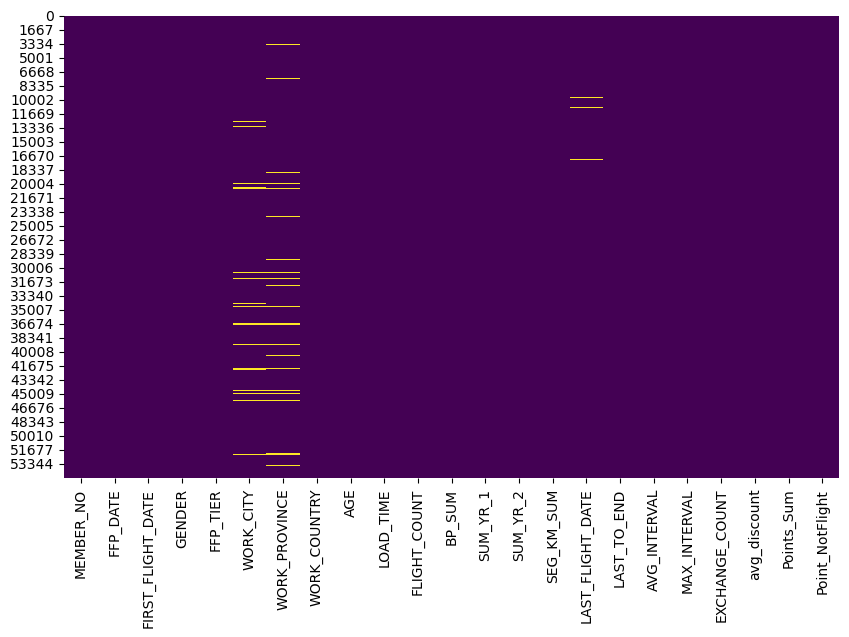

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [10]:
df['WORK_COUNTRY'].fillna('Unknown', inplace=True)
df['WORK_PROVINCE'].fillna('Unknown', inplace=True)
df['WORK_CITY'].fillna('Unknown', inplace=True)

C:\Users\Ragupathy\AppData\Local\Temp\ipykernel_15044\859242074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WORK_COUNTRY'].fillna('Unknown', inplace=True)
C:\Users\Ragupathy\AppData\Local\Temp\ipykernel_15044\859242074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [11]:
missing_values = df.isnull().sum()
print(missing_values)

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 3
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_FLIGHT_DATE     400
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64


In [12]:
# Handling missing data with most frequnt date
most_recent_date = df['LAST_FLIGHT_DATE'].max()
df['LAST_FLIGHT_DATE'].fillna(most_recent_date, inplace=True)

C:\Users\Ragupathy\AppData\Local\Temp\ipykernel_15044\2357918861.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LAST_FLIGHT_DATE'].fillna(most_recent_date, inplace=True)


In [13]:
missing_values = df.isnull().sum()
print(missing_values)

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               3
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [14]:
# Encode Gender
df['GENDER'] = df['GENDER'].fillna('Unknown')
df['GENDER'] = df['GENDER'].map({'Male': 1, 'Female': 0, 'Unknown': 2})

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [16]:
print(df['GENDER'].unique())

[1 0 2]


In [17]:
# missing_values = df.isnull().sum()
# print(missing_values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          55000 non-null  float64       
 1   FFP_DATE           55000 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  55000 non-null  datetime64[ns]
 3   GENDER             55000 non-null  int64         
 4   FFP_TIER           55000 non-null  float64       
 5   WORK_CITY          55000 non-null  object        
 6   WORK_PROVINCE      55000 non-null  object        
 7   WORK_COUNTRY       55000 non-null  object        
 8   AGE                55000 non-null  float64       
 9   LOAD_TIME          55000 non-null  datetime64[ns]
 10  FLIGHT_COUNT       55000 non-null  float64       
 11  BP_SUM             55000 non-null  float64       
 12  SUM_YR_1           55000 non-null  float64       
 13  SUM_YR_2           55000 non-null  float64       
 14  SEG_KM

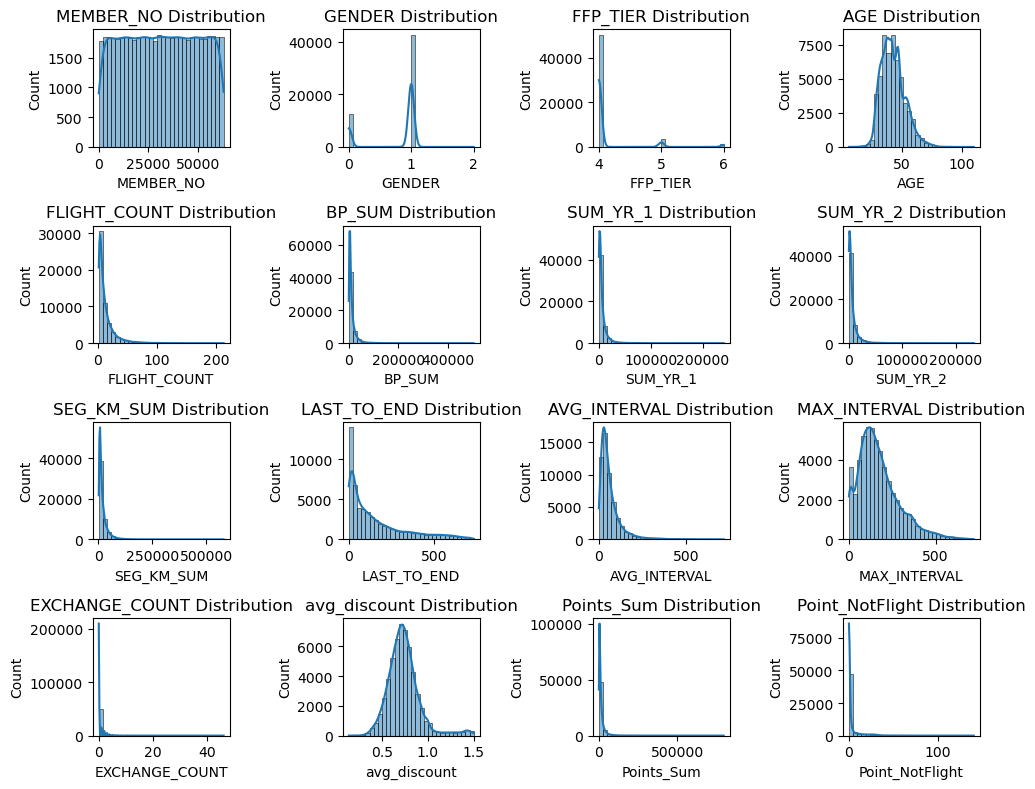

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_num = df.select_dtypes(include=[np.number])
num_cols = len(df_num.columns)


cols = 4
rows = int(np.ceil(num_cols / cols))
plt.figure(figsize=(10, 8))

for i, column in enumerate(df_num.columns):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[column].dropna(), kde=True, bins=30)
    plt.title(f'{column} Distribution')

plt.tight_layout()
plt.show()


In [19]:
missing_values = df.isnull().sum()
print(missing_values)

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64


In [20]:
df['Advance_Booking'] = (df['FIRST_FLIGHT_DATE'] - df['FFP_DATE']).dt.days
df['Loyalty_Duration'] = (df['LOAD_TIME'] - df['FFP_DATE']).dt.days
df['Flight_Activity_Duration'] = (df['LAST_FLIGHT_DATE'] - df['FIRST_FLIGHT_DATE']).dt.days
df['Discount_Sensitivity'] = 1 - df['avg_discount']
df['Avg_KM_per_Flight'] = df['SEG_KM_SUM'] / df['FLIGHT_COUNT']

In [21]:
missing_values = df.isnull().sum()
print(missing_values)

MEMBER_NO                   0
FFP_DATE                    0
FIRST_FLIGHT_DATE           0
GENDER                      0
FFP_TIER                    0
WORK_CITY                   0
WORK_PROVINCE               0
WORK_COUNTRY                0
AGE                         0
LOAD_TIME                   0
FLIGHT_COUNT                0
BP_SUM                      0
SUM_YR_1                    0
SUM_YR_2                    0
SEG_KM_SUM                  0
LAST_FLIGHT_DATE            0
LAST_TO_END                 0
AVG_INTERVAL                0
MAX_INTERVAL                0
EXCHANGE_COUNT              0
avg_discount                0
Points_Sum                  0
Point_NotFlight             0
Advance_Booking             0
Loyalty_Duration            0
Flight_Activity_Duration    0
Discount_Sensitivity        0
Avg_KM_per_Flight           0
dtype: int64


In [22]:
# Demographic Features
demo_features = ['AGE', 'GENDER', 'FFP_TIER']

# Behavioral
behavioral_features = ['FLIGHT_COUNT', 'SEG_KM_SUM', 'AVG_INTERVAL', 'Discount_Sensitivity']

# Psychographic
psychographic_features = ['Loyalty_Duration', 'Advance_Booking', 'Flight_Activity_Duration']

# Geographic
geo_features = ['Avg_KM_per_Flight', 'WORK_COUNTRY']

df['WORK_COUNTRY_CODE'] = df['WORK_COUNTRY'].astype('category').cat.codes

final_features = demo_features + behavioral_features + psychographic_features + ['WORK_COUNTRY_CODE']


In [23]:
missing_values = df.isnull().sum()
print(missing_values)

MEMBER_NO                   0
FFP_DATE                    0
FIRST_FLIGHT_DATE           0
GENDER                      0
FFP_TIER                    0
WORK_CITY                   0
WORK_PROVINCE               0
WORK_COUNTRY                0
AGE                         0
LOAD_TIME                   0
FLIGHT_COUNT                0
BP_SUM                      0
SUM_YR_1                    0
SUM_YR_2                    0
SEG_KM_SUM                  0
LAST_FLIGHT_DATE            0
LAST_TO_END                 0
AVG_INTERVAL                0
MAX_INTERVAL                0
EXCHANGE_COUNT              0
avg_discount                0
Points_Sum                  0
Point_NotFlight             0
Advance_Booking             0
Loyalty_Duration            0
Flight_Activity_Duration    0
Discount_Sensitivity        0
Avg_KM_per_Flight           0
WORK_COUNTRY_CODE           0
dtype: int64


In [24]:
df["Loyalty_Duration"]

0        2706
1        2597
2        2615
3        2047
4        1816
         ... 
54995     426
54996    1963
54997    1067
54998    1382
54999    1929
Name: Loyalty_Duration, Length: 55000, dtype: int64

In [25]:
missing_values = df.isnull().sum()
print(missing_values)


MEMBER_NO                   0
FFP_DATE                    0
FIRST_FLIGHT_DATE           0
GENDER                      0
FFP_TIER                    0
WORK_CITY                   0
WORK_PROVINCE               0
WORK_COUNTRY                0
AGE                         0
LOAD_TIME                   0
FLIGHT_COUNT                0
BP_SUM                      0
SUM_YR_1                    0
SUM_YR_2                    0
SEG_KM_SUM                  0
LAST_FLIGHT_DATE            0
LAST_TO_END                 0
AVG_INTERVAL                0
MAX_INTERVAL                0
EXCHANGE_COUNT              0
avg_discount                0
Points_Sum                  0
Point_NotFlight             0
Advance_Booking             0
Loyalty_Duration            0
Flight_Activity_Duration    0
Discount_Sensitivity        0
Avg_KM_per_Flight           0
WORK_COUNTRY_CODE           0
dtype: int64


In [26]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,Advance_Booking,Loyalty_Duration,Flight_Activity_Duration,Discount_Sensitivity,Avg_KM_per_Flight,WORK_COUNTRY_CODE
0,54993.0,2006-11-02,2008-12-24,1,6.0,.,beijing,CN,31.0,2014-03-31,...,34.0,0.961639,619760.0,50.0,783,2706,1923,0.038361,2765.319048,22
1,28065.0,2007-02-19,2007-08-03,1,6.0,Unknown,beijing,CN,42.0,2014-03-31,...,29.0,1.252314,415768.0,33.0,165,2597,2426,-0.252314,2097.700000,22
2,55106.0,2007-02-01,2007-08-30,1,6.0,.,beijing,CN,40.0,2014-03-31,...,20.0,1.254676,406361.0,26.0,210,2615,2395,-0.254676,2101.570370,22
3,21189.0,2008-08-22,2008-08-23,1,5.0,Los Angeles,CA,US,64.0,2014-03-31,...,11.0,1.090870,372204.0,12.0,1,2047,1951,-0.090870,12232.000000,97
4,39546.0,2009-04-10,2009-04-15,1,6.0,guiyang,guizhou,CN,48.0,2014-03-31,...,27.0,0.970658,338813.0,39.0,5,1816,1807,0.029342,2039.000000,22


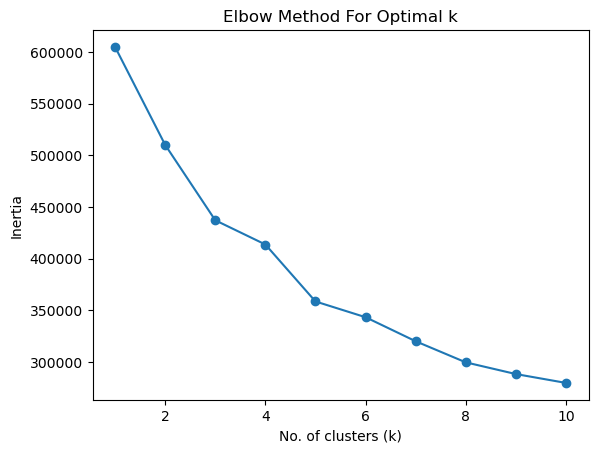

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(df[final_features])

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot
plt.plot(K, inertia, marker='o')
plt.xlabel('No. of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [28]:
optimal_k = 4 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)



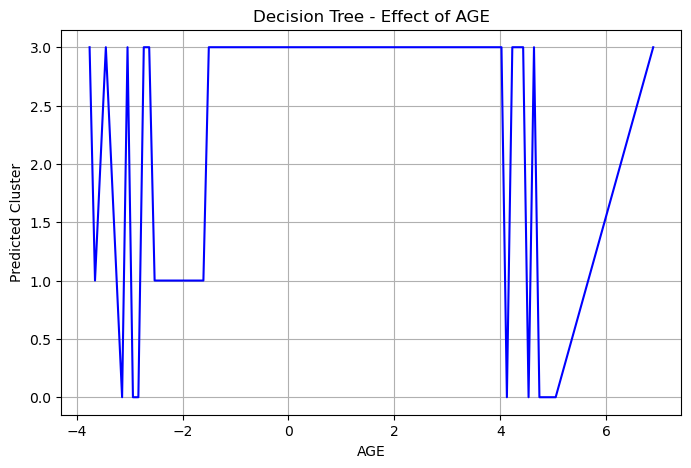

In [29]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

feature_name = final_features[0]
X_single = X[:, 0].reshape(-1, 1)

# Train tree with 1 feature
tree_model = DecisionTreeClassifier()
tree_model.fit(X_single, df['Cluster'])

# Create sorted feature values
sorted_indices = np.argsort(X[:, 0])
sorted_feature_data = X[:, 0][sorted_indices].reshape(-1, 1)

# Predict
sorted_predictions = tree_model.predict(sorted_feature_data)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_feature_data, sorted_predictions, color='blue')
plt.title(f'Decision Tree - Effect of {feature_name}')
plt.xlabel(feature_name)
plt.ylabel('Predicted Cluster')
plt.grid(True)
plt.show()



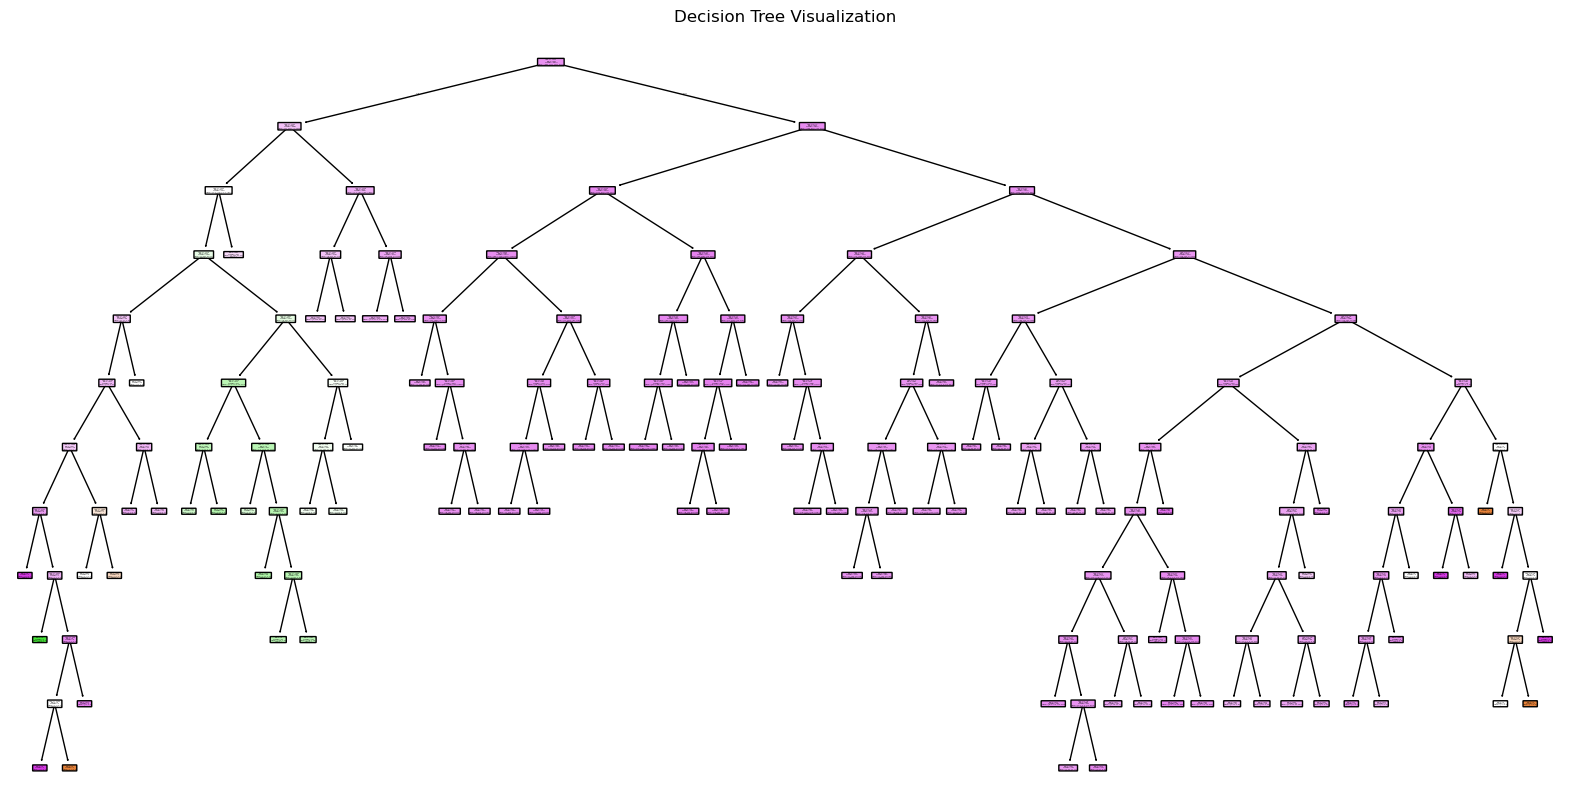

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=final_features, class_names=[str(c) for c in tree_model.classes_],
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


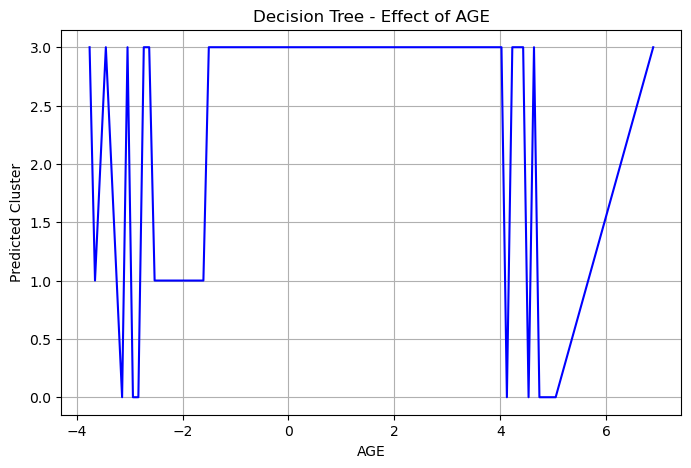

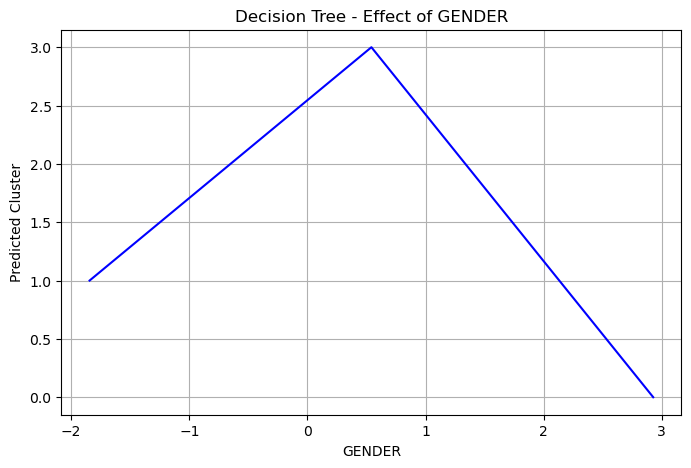

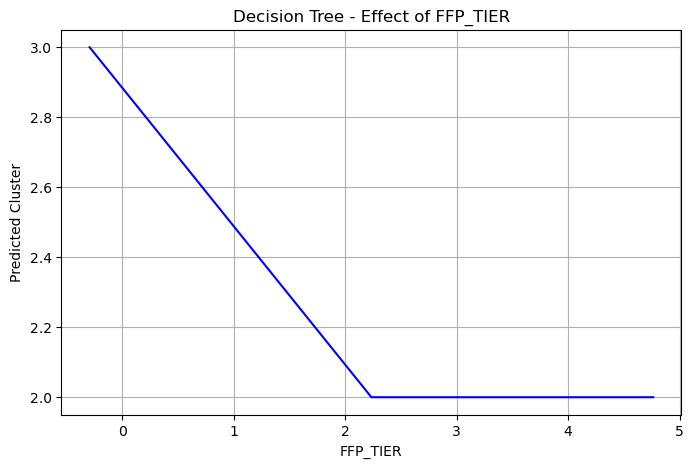

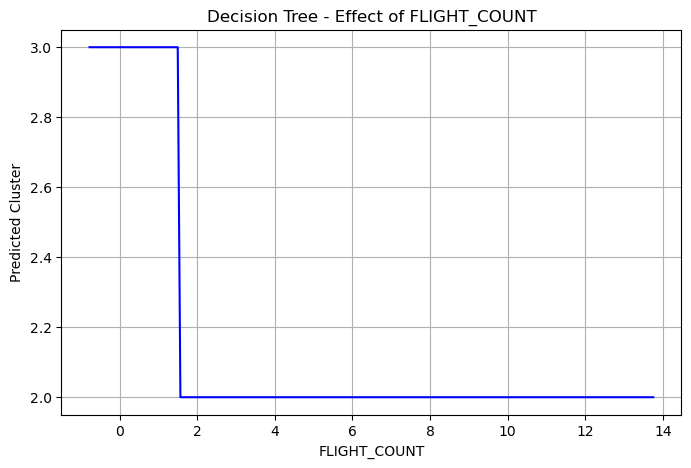

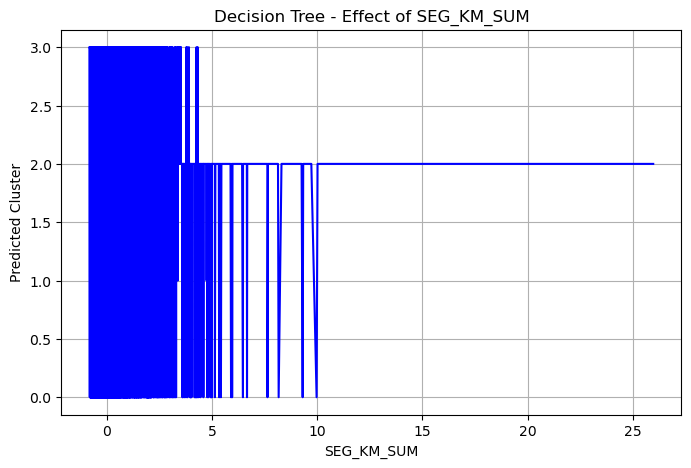

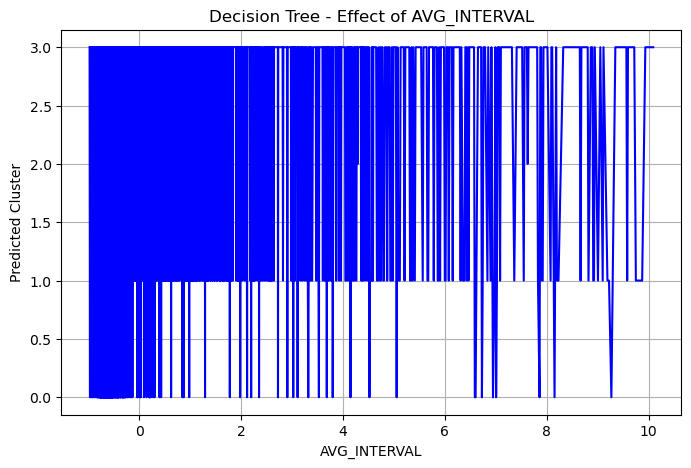

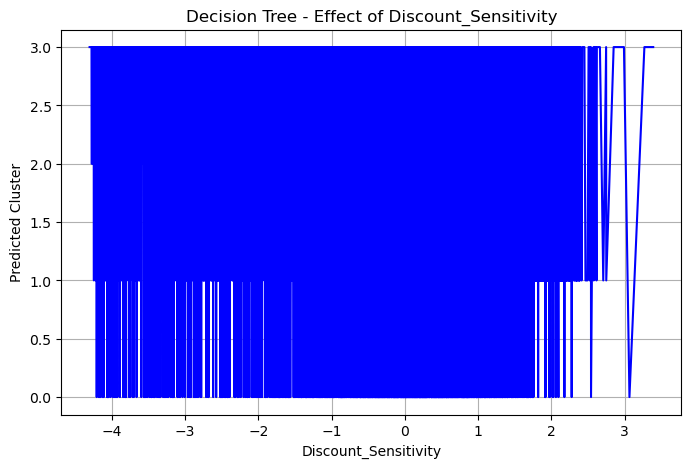

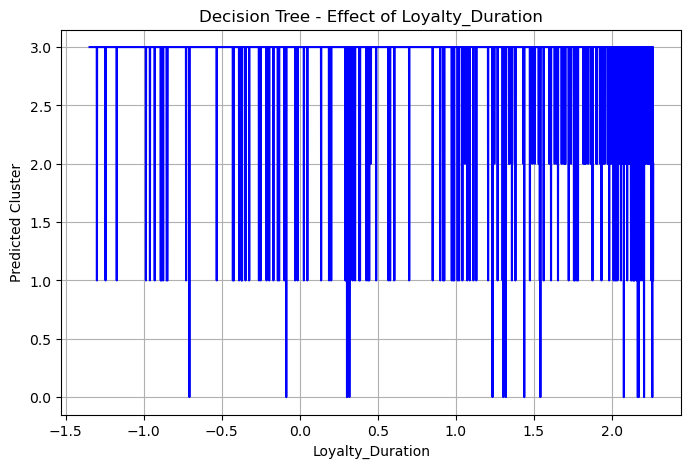

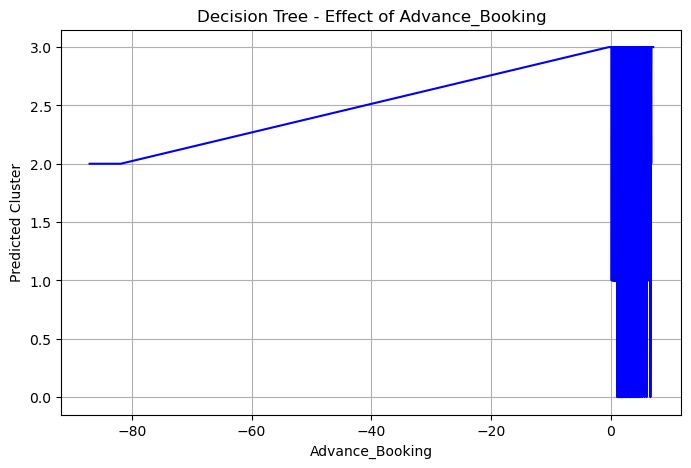

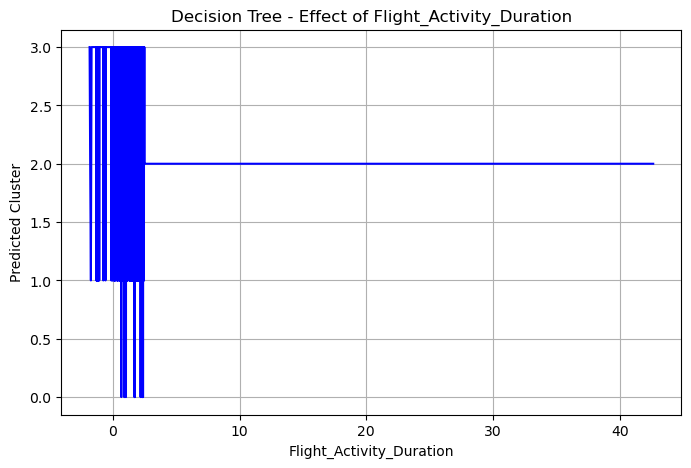

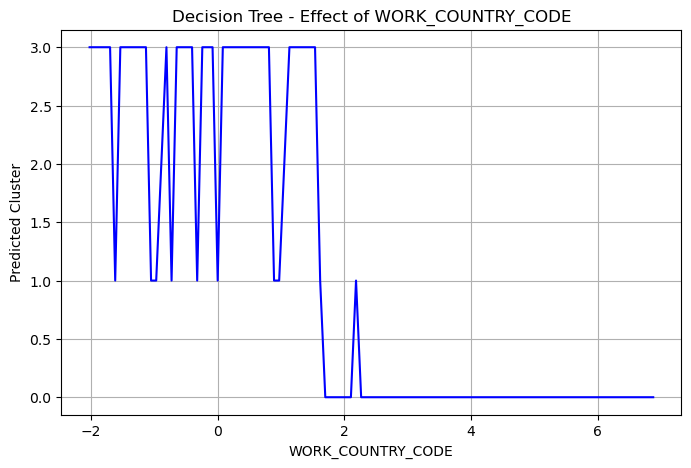

In [31]:
for idx, feature_name in enumerate(final_features):
    
    # Extract one feature at a time
    X_single = X[:, idx].reshape(-1, 1)
    
    # Train a Decision Tree
    tree_model = DecisionTreeClassifier()
    tree_model.fit(X_single, df['Cluster'])
    
    # Sort feature values for smooth plotting
    sorted_indices = np.argsort(X[:, idx])
    sorted_feature_data = X[:, idx][sorted_indices].reshape(-1, 1)
    
    # Predict clusters
    sorted_predictions = tree_model.predict(sorted_feature_data)
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(sorted_feature_data, sorted_predictions, color='blue')
    plt.title(f'Decision Tree - Effect of {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Cluster')
    plt.grid(True)
    plt.show()